In [29]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
from rasterio import MemoryFile
from rasterio.plot import show
from owslib.wcs import WebCoverageService
import folium
import pandas as pd


# function for WMS vector


def get_layer(name,url = "http://geodata.gov.gr/geoserver/ows"):
    
    

    # Initialize
    wfs = WebFeatureService(url=url)
    
    if name=='contents':
        
        return (wfs.contents.keys())
    


    # Fetch the  layer (as an example) --> 'vaestoruutu:vaki2017_5km'
    layer = name


    # Specify the parameters for fetching the data
    params = dict(service='WFS', version="2.0.0", request='GetFeature',
          typeName=layer, outputFormat='shape-zip')

    # Parse the URL with parameters
    q = Request('GET', url, params=params).prepare().url

    # Read data from URL
    data = gpd.read_file(q)
    return data

def insert_layer(layer,url='http://localhost:8082/geoserver/ows?SERVICE=WMS&/MapServer/tile/{z}/{y}/{x}',name=None):
    if name==None:name=layer
    folium.raster_layers.WmsTileLayer(
    url=url,
    name=name,
    fmt="image/png",
    layers=layer,
    transparent=True,
    overlay=True,
    control=True,
    ).add_to(m)



In [2]:

        
# Add everything as WMS


m = folium.Map(location=[37, 23], zoom_start=6)

insert_layer('rgb')
insert_layer('ndvi')
insert_layer('AERODROMIA1')
insert_layer('sidhrodromiko_diktyo1')



insert_layer('geodata.gov.gr:6ac1b167-df9c-47b5-8cc0-ffdad7a13042',
           url='http://geodata.gov.gr/geoserver/ows?service=WMS&',
             name='ydrografiko_diktyo' )

insert_layer('geodata.gov.gr:8c9ed64e-91d6-4078-ae77-549c671e7072',
           url='http://geodata.gov.gr/geoserver/ows?service=WMS&',
             name='elegxomenes_kynigetikes_perioxes' )





folium.LayerControl().add_to(m)

m


In [3]:



#downloaded from gov.geodata , needs inverse coords

aerodromia=get_layer('geodata.gov.gr:4f097ff9-4fbb-4411-86f3-1e7e621df61a')
m = folium.Map(location=[37, 23], zoom_start=6)
print(aerodromia.crs)
aerodromia=aerodromia.to_crs('EPSG:3857')#default crs for folium
folium.GeoJson(aerodromia, name="aerodromia").add_to(m)
folium.LayerControl().add_to(m)
m

{'init': 'epsg:2100'}
EPSG:3857


In [3]:

# we can try and  GET WFS contents from localhost geoserver

url='http://localhost:8082/geoserver/ows'

wfs = WebFeatureService(url=url)
    
wfs.contents

{'ntua:AERODROMIA1': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543b00>,
 'tiger:poly_landmarks': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543cc0>,
 'tiger:poi': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543cf8>,
 'tiger:tiger_roads': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543dd8>,
 'sf:archsites': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543b70>,
 'sf:bugsites': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543320>,
 'sf:restricted': <owslib.feature.wfs100.ContentMetadata at 0x7f90e75438d0>,
 'sf:roads': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543358>,
 'sf:streams': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543160>,
 'topp:tasmania_cities': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543860>,
 'topp:tasmania_roads': <owslib.feature.wfs100.ContentMetadata at 0x7f90e75434a8>,
 'topp:tasmania_state_boundaries': <owslib.feature.wfs100.ContentMetadata at 0x7f90e7543898>,
 'topp:tasmania_water_bodies': <owslib.feature.

In [7]:

#We get file from our geoserver



params = dict(service='WFS', version="2.0.0", request='GetFeature',
      typeName='AERODROMIA1', outputFormat='shape-zip')


q = Request('GET', url, params=params).prepare().url


df = gpd.read_file(q)







m = folium.Map(location=[37, 23], zoom_start=4)
folium.GeoJson(df, name="aerodromia").add_to(m)




folium.LayerControl().add_to(m)
m

{'init': 'epsg:2100'} {'init': 'epsg:2100'}


In [57]:
# We flipped the coords and changed crs with QGIS, and we read the file from storage( WFS completed before)


#We can see as an event tips for each feature, and search for them with keywords

from folium.plugins import Search

m = folium.Map(location=[37, 23], zoom_start=4)

df1=gpd.read_file('test',encoding='windows-1253')
#df1=df1.to_crs('EPSG:4326')

airs = folium.GeoJson(
    df1,
    name="Airports",
    tooltip=folium.GeoJsonTooltip(
        fields=["onoma"]
    )).add_to(m)
airsearch = Search(
    layer=airs,
    geom_type="Point",
    placeholder="Search for a GR Airport",
    collapsed=False,
    search_label="onoma",
    weight=3,
).add_to(m)


folium.LayerControl().add_to(m)
m


In [7]:
#We can also search with a bounding box in a spatial fashion

from folium.plugins import Draw

m = folium.Map(location=[37, 23], zoom_start=6)

insert_layer('rgb')
insert_layer('ndvi')
insert_layer('AERODROMIA1')
insert_layer('sidhrodromiko_diktyo1')



insert_layer('geodata.gov.gr:6ac1b167-df9c-47b5-8cc0-ffdad7a13042',
           url='http://geodata.gov.gr/geoserver/ows?service=WMS&',
             name='ydrografiko_diktyo' )

insert_layer('geodata.gov.gr:8c9ed64e-91d6-4078-ae77-549c671e7072',
           url='http://geodata.gov.gr/geoserver/ows?service=WMS&',
             name='elegxomenes_kynigetikes_perioxes' )




draw = Draw(export=True,filename='my_draw.geojson')
draw.add_to(m)
folium.LayerControl().add_to(m)

m


In [77]:
# How to search WFS for features inside polygon

#read the poly you selected

poly=gpd.read_file('my_draw.geojson')




poly=gpd.read_file('my_draw.geojson')
bbox=gpd.GeoDataFrame(poly.bounds)


from pyproj import Proj, transform

inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:2100')
bbox.iloc[0,0]
x1,y1 = bbox.iloc[0,0],bbox.iloc[0,1]
x2,y2 = transform(inProj,outProj,x1,y1)
x3,y3 = bbox.iloc[0,2],bbox.iloc[0,3]
x4,y4 = transform(inProj,outProj,x3,y3)





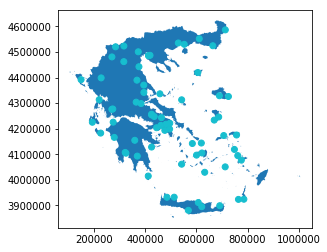

In [78]:
url='http://localhost:8082/geoserver/ows'

wfs = WebFeatureService(url=url)
    
# Specify the parameters for fetching the data

bbox='94874.71,3868409.44,857398.00,4630676.91'

#bbox=str(x2)+","+str(y2)+','+str(x4)+","+str(y4)


params = dict(service='WFS', version="2.0.0", request='GetFeature',
      typeName='AERODROMIA1', outputFormat='shape-zip',BBox=bbox)

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
df = gpd.read_file(q)

from shapely.ops import cascaded_union


result=cascaded_union(df['geometry'])

nomoi = gpd.read_file("nomoi_okxe/nomoi_okxe.shp",encoding='windows-1253')
nom=cascaded_union(nomoi['geometry'])

gpd.GeoSeries( [nom,result]).plot(cmap='tab10')


In [79]:
from owslib.wcs import WebCoverageService

url='http://localhost:8082/geoserver/ows?service=wcs&version=1.1.0&request=GetCapabilities'

wcs = WebCoverageService(url=url)
    

wcs.contents




/usr/lib/python3/dist-packages/owslib/coverage/wcs110.py:87: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem=self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))


{'nurc:Arc_Sample': <owslib.coverage.wcs110.ContentMetadata at 0x7f0471934908>,
 'nurc:Img_Sample': <owslib.coverage.wcs110.ContentMetadata at 0x7f04722cd6a0>,
 'nurc:Pk50095': <owslib.coverage.wcs110.ContentMetadata at 0x7f0471b9d160>,
 'sf:sfdem': <owslib.coverage.wcs110.ContentMetadata at 0x7f0467463d30>,
 'nurc:mosaic': <owslib.coverage.wcs110.ContentMetadata at 0x7f0467691d30>,
 'geonode:ndvi': <owslib.coverage.wcs110.ContentMetadata at 0x7f0467691f28>,
 'ntua:rgb': <owslib.coverage.wcs110.ContentMetadata at 0x7f04675022e8>}

In [4]:
#See some keywords

wcs.contents['ntua:rgb'].keywords



['rgb', 'WCS', 'GeoTIFF', 'Kastoria', 'GBDA', 'RGB']

In [ ]:
#Next on QGIS and MetaSearch plugin